# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [3]:
import numpy as np
import pandas as pd
from plotnine import *

In [6]:
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [7]:
# Code here

my_dict = {
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
}

df_titanic["type"] = df_titanic["class"].map(my_dict)

In [8]:
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger
...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,NaN


In [ ]:
passenger = df_titanic[df_titanic["type"]=="passenger"]
passenger

In [10]:
pd.crosstab((passenger['class']) ,passenger["embarked"], normalize=True)

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [11]:
crosstab = pd.crosstab(passenger['class'], df_titanic["embarked"], normalize=True) # don't have to do the df_titanic

In [12]:
conditional_class_given_embarked = crosstab.div(crosstab.sum(axis=0), axis=1)
conditional_embarked_given_class = crosstab.div(crosstab.sum(axis=1), axis=0)

In [13]:
#class | embarked B
0.002278	+ 0.004556

# 1st class | embarked B

0.002278/0.006834 # = 0.33333333333333337

# 2nd class | embarked B
0.004556 / 0.006834 # = 0.6666666666666667

#3rd Class | embarked B
0


#class | embarked C

0.527675 + 0.095941 + 0.376384
# 1st class | embarked C

0.527675/0.006834 # = 0.33333333333333337

# 2nd class | embarked C
0.004556 / 0.006834 # = 0.6666666666666667

#3rd Class | embarked C


0.6666666666666667

In [14]:
conditional_embarked_given_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [15]:
#class | embarked C
0.441358 + 0.091549 + 0.143865 # = 0.676772

# 1st class | embarked c
0.441358/0.676772 # = 0.6521516847623718

# 2nd class | embarked c

#3rd Class | embarked c

0.6521516847623718

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [25]:
conditional_class_given_embarked #this table is not tidy, it needs to be transformed into a differnt data frame

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [26]:

#data = {'p_c|e': [0.333333,0.666667,0.000000,0.527675,0.095941,0.376384,
                                         #0.024390,0.056911,	0.918699,0.191466,0.268053,	0.540481],
data = {'embarked':["B","C","Q","S"],
        '1st': [	0.333333,	0.527675,	0.024390,	0.191466],
        '2nd': [0.666667,	0.095941,	0.056911,	0.268053	]	,
        '3rd': [0.000000,	0.376384,	0.918699,	0.540481]}





In [27]:
df_c = pd.DataFrame(data, columns = ['embarked','1st','2nd','3rd'])

In [28]:
df_c # new data frame with tidy data

,embarked,1st,2nd,3rd
0,B,0.333333,0.666667,0.000000
1,C,0.527675,0.095941,0.376384
2,Q,0.024390,0.056911,0.918699
3,S,0.191466,0.268053,0.540481


In [29]:
a = df_c.melt(id_vars = "embarked", value_vars=["1st","2nd","3rd"]) #makes embarked labelsand values in the bars class

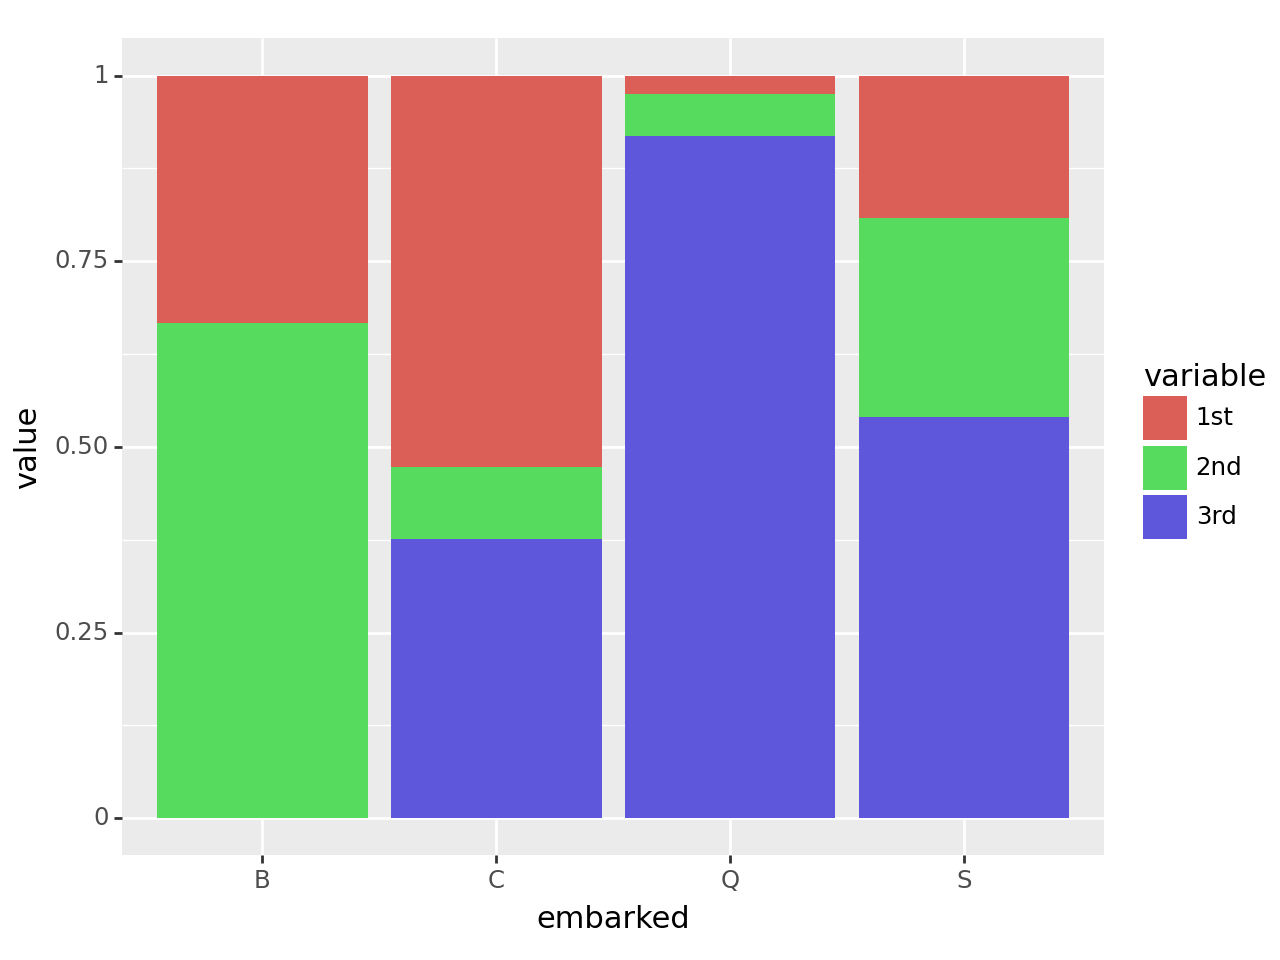

<Figure Size: (640 x 480)>

In [30]:
#code here
(ggplot(a, aes(x = "embarked", y= "value")) #"value" is the numeric values and form of the data under class (1st, 2nd, 3rd)
+ geom_bar(aes(fill="variable"), stat="identity", position = "fill")) #variable is class. I don't think position is necessary but idk

In [31]:
#first attempt
# Code here

#(ggplot(data=df_c)
#+ geom_bar()
#+ aes(x = "embarked", y= '1st')


In [32]:
#Second attempt
#type(conditional_class_given_embarked)

#ggplot(data=df_c) + geom_histogram(aes(x = 'probabilities_class|embarked', fill = 'class'))